<a href="https://colab.research.google.com/github/susant146/susant146/blob/main/Image_Processing_and_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing and Computer Vision Basics

**Application of Computer Vision in Autonomous System** [Visual Perception and Autonomous]

**Designed By**: Dr. Susant Kumar Panigrahi

Assistant Professor, SEEE, VIT Bhopal

In [ ]:
from google. colab import drive
drive. mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the Dependencies**

1.   [Numpy](https://numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
2.   [Pandas](https://https://pandas.pydata.org/) is a library for data manipulation and data analysis.
3.  [CV2](https://https://opencv.org/) is a library for computer vision tasks.
4. [Matplotlib](https://https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

# Reading Images

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pylab as plt

# Fundametals of Image Pre-Processing

 **Reading Grayscale image**

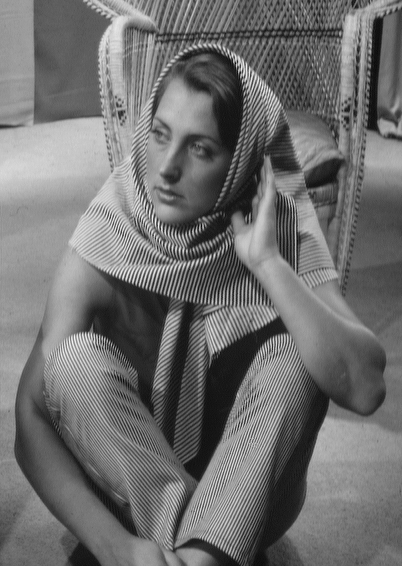

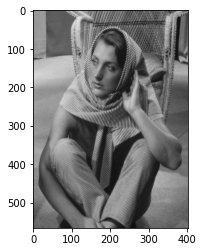

In [ ]:
# Reading the image using imread() function
image_gray = cv2.imread('/content/barbara.tif')
cv2_imshow(image_gray)  # Displaying image using OpenCV
plt.imshow(image_gray)   # Display image using Matplotlib

**Reading Color image**

In [ ]:
# Reading the image using imread() function
image_col = cv2.imread('/content/I23.BMP')
cv2_imshow(image_col)  # Displaying image using OpenCV
plt.imshow(image_col)   # Display image using Matplotlib

**Finding Image Details**

Image Properties
- Number of Pixels: 1343112
- Shape/Dimensions: (764, 586, 3)


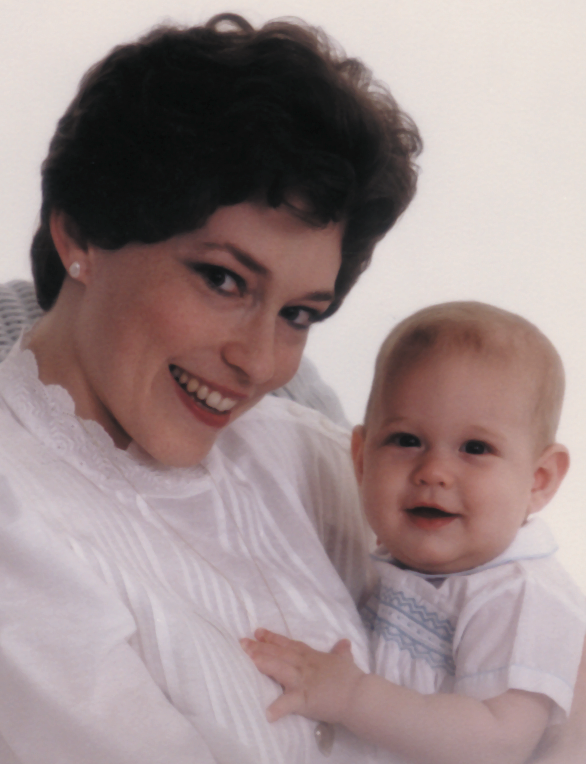

In [ ]:
img = cv2.imread('/content/Fig0636(woman_baby_original).tif')

print("Image Properties")
print("- Number of Pixels: " + str(img.size))
print("- Shape/Dimensions: " + str(img.shape))
cv2_imshow(img)

In [ ]:
blue, green, red = cv2.split(img) # Split the image into its channels
cv2_imshow(green)
print("- Shape/Dimensions: ", blue.shape)

**Splitting an Image into Individual Channels**

In [ ]:
blue, green, red = cv2.split(img) # Split the image into its channels
#img_gs = cv2.imread('/content/I23.BMP', cv2.IMREAD_GRAYSCALE) # Convert image to grayscale


# Dimension Information of image---
height, width, channels = img.shape
zero_array = np.zeros([height, width])
blue_img = np.zeros([height, width, channels]) # Blue Channel
blue_img[:,:,0] = blue;

green_img = np.zeros([height, width, channels]) # Green Channel
green_img[:,:,1] = green;

red_img = np.zeros([height, width, channels]) # Red Channel
red_img[:,:,2] = red;
# Horizontally concatenate the 3 images
img3 = cv2.hconcat([blue_img, green_img, red_img])

cv2_imshow(img3)


**Converting Color Space**

In [ ]:
img = cv2.imread('/content/I23.BMP')
#From which color code to which color that image has to be converted'''
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(3,1,1)
plt.imshow(img)

# converting color images to grayscale image ----
# Using Inbuilt Function.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(3,1,2)
plt.imshow(img_gray, cmap='gray')

# Using Formula --- Color to Gray
img_gray1 = 0.2989*img[:,:,2] + 0.5870*img[:,:,1] + 0.1140*img[:,:,0]
plt.subplot(3, 1, 3)
plt.imshow(img_gray1, cmap='gray')

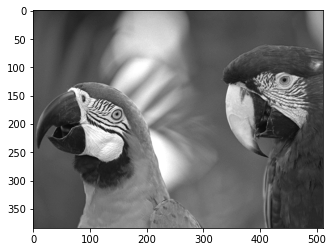

In [ ]:
img_gray1 = 0.2989*img[:,:,2] + 0.5870*img[:,:,1] + 0.1140*img[:,:,0]
plt.imshow(img_gray1, cmap='gray')

**Basic Pre-Processing Techniques on Images**

**Resize**

cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])

*Parameter*	         ~ ~ ~ ~ ~ ~ ~ ~ ~        *Description*

---




*   *src*	    ~    [required] source/input image
*   *dsize*     ~	 [required] desired size for the output image


*   *fx*	     ~   [optional] scale factor along the horizontal axis
*   *fy*	       ~   [optional] scale factor along the vertical axis



*   *interpolation*	 ~ [optional] flag that takes one of the following methods. INTER_NEAREST – a nearest-neighbor interpolation INTER_LINEAR – a bilinear interpolation (used by default) INTER_AREA – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method. INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood

Original Dimensions :  (834, 1114)
Resized Dimensions :  (512, 512)
Colour image Dimensions :  (384, 512, 3)
Colour Resized Dimensions :  (512, 512, 3)
Resize with Scale factor :  (500, 668)


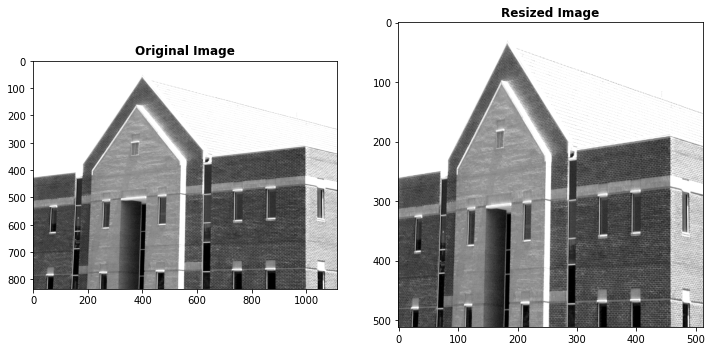

In [ ]:
# Image Resizing ....
img = cv2.imread('/content/Building_Light.tif', 0)
print('Original Dimensions : ',img.shape)

dsize = (512, 512)
out_img = cv2.resize(img, dsize)
print('Resized Dimensions : ',out_img.shape)

# Read a color image ---
col_img = cv2.imread('/content/I23.BMP')
print('Colour image Dimensions : ',col_img.shape)
dsize = (512, 512)
out_colimg = cv2.resize(col_img, dsize)
print('Colour Resized Dimensions : ',out_colimg.shape)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Original Image', fontweight = 'bold')

fig.add_subplot(122)
plt.imshow(out_img, cmap = 'gray')
plt.title('Resized Image', fontweight = 'bold')

# Resize using scale factor; Preserve Aspect Ratio
scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
out_img1 = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
print('Resize with Scale factor : ',out_img1.shape)

**Image Crop**

Dimension of input image:  (512, 512)
[[ 46  49  60 ...  93  80 110]
 [ 60  44  52 ... 133 147 156]
 [ 65  44  53 ...  84  95  99]
 ...
 [107 114 125 ... 140 136 135]
 [154 167 164 ... 138 136 138]
 [156 151 159 ... 136 135 139]]
Dimension of cropped image:  (350, 412)


Text(0.5, 1.0, 'Cropped Image')

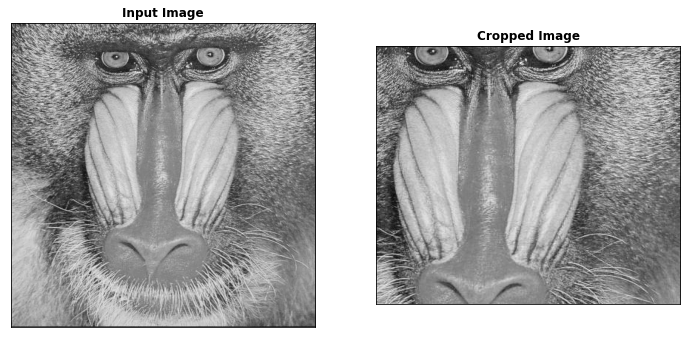

In [ ]:
# Read an image ----
img = cv2.imread('/content/Baboon.jpg', 0) # Grayscale Image
print('Dimension of input image: ', img.shape)

crop_img = img[50:400, 100:700]  # Retain image data between 50 to 200 and 40 to 180
print(crop_img)
print('Dimension of cropped image: ', crop_img.shape)

fig = plt.figure(figsize=[12,12])
fig.add_subplot(1,2,1)
plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Input Image', fontweight = 'bold')

fig.add_subplot(1,2,2)
plt.imshow(crop_img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Cropped Image', fontweight = 'bold')

# cv2_imshow(crop_img)

**Image Rotation**

Image Dimension input (438, 576)
Image Dimension rot180 (576, 438)


([], <a list of 0 Text major ticklabel objects>)

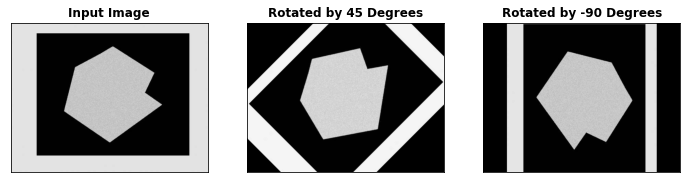

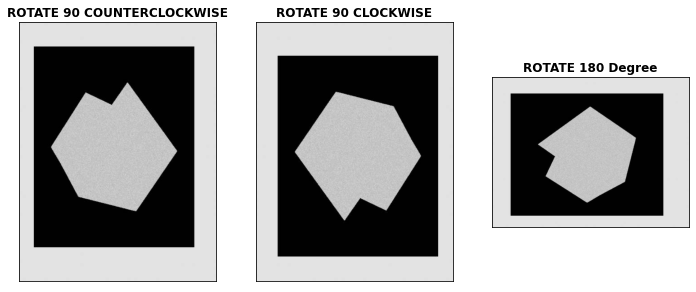

In [ ]:
image = cv2.imread('/content/PatternImg.jpg', 0)

fig = plt.figure(figsize = (12,12))
fig.add_subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title('Input Image', fontweight = 'bold'), plt.xticks([])
plt.yticks([])

# grab the dimensions of the image and calculate the center of the
# image
(h, w) = image.shape[:2]
(cX, cY) = (w // 2, h // 2)

# rotate our image by 45 degrees around the center of the image
M = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated45 = cv2.warpAffine(image, M, (w, h))
fig.add_subplot(1,3,2)
plt.imshow(rotated45, cmap = 'gray')
plt.title('Rotated by 45 Degrees', fontweight = 'bold'), plt.xticks([])
plt.yticks([])

# rotate our image by -90 degrees around the image
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated90 = cv2.warpAffine(image, M, (w, h))
fig.add_subplot(1,3,3)
plt.imshow(rotated90, cmap = 'gray')
plt.title('Rotated by -90 Degrees', fontweight = 'bold'), plt.xticks([])
plt.yticks([])

# Using cv2.rotate() method
# Using cv2.ROTATE_90_COUNTERCLOCKWISE
# rotate by 270 degrees clockwise
img_rot270 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_rot90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
img_rot180 = cv2.rotate(image, cv2.ROTATE_180)
print('Image Dimension input', image.shape)
print('Image Dimension rot180', img_rot90.shape)

fig = plt.figure(figsize = (12,12))
fig.add_subplot(1,3,1)
plt.imshow(img_rot270, cmap = 'gray')
plt.title('ROTATE 90 COUNTERCLOCKWISE', fontweight = 'bold'), plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(img_rot90, cmap = 'gray')
plt.title('ROTATE 90 CLOCKWISE', fontweight = 'bold'), plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(img_rot180, cmap = 'gray')
plt.title('ROTATE 180 Degree', fontweight = 'bold'), plt.xticks([])
plt.yticks([])

**Image GrayLevel Quantization**

Text(0.5, 1.0, '2-Bit Image: Intensity (0, 64, 128, 255)')

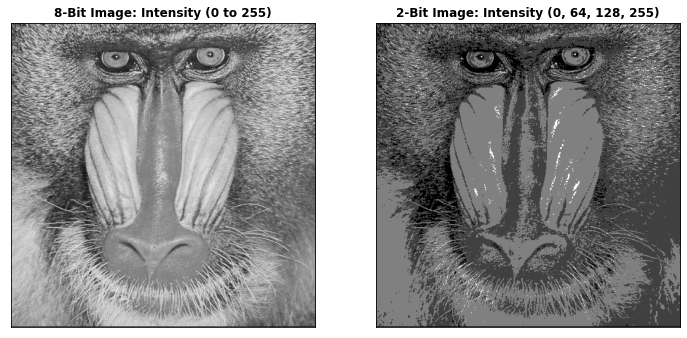

In [ ]:
img = cv2.imread('/content/Baboon.jpg', 0)
row, col = img.shape[0], img.shape[1]

# Create a dummy image to get the final result.
img_quant = np.zeros((row, col), np.uint8)

# Image with 4 quantized vales ---
# input       output
# 0-63        0
# 64-127      64
# 128-191     128
# 192-255     192

for i in range(row):
  for j in range(col):
    if img[i, j] < 64:
      img_quant[i,j] = 0
    elif (img[i, j] >= 64) & (img[i,j] < 128):
      img_quant[i,j] = 64
    elif (img[i, j] >= 128) & (img[i,j] < 192):
      img_quant[i,j] = 128
    elif (img[i, j] >= 192) & (img[i,j] < 256):
      img_quant[i,j] = 255

fig = plt.figure(figsize = (12, 12))
fig.add_subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('8-Bit Image: Intensity (0 to 255)', fontweight = 'bold')

fig.add_subplot(1,2,2)
plt.imshow(img_quant, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('2-Bit Image: Intensity (0, 64, 128, 255)', fontweight = 'bold')

**Image Negative**

In [ ]:
import cv2
import numpy as np
# Load the image
img = cv2.imread('/content/Cameraman.tif')
cv2_imshow(img)
# Check the datatype of the image
print(img.dtype)
# Subtract the img from max value(calculated from dtype)
img_neg = 255 - img
# Show the image
cv2_imshow(img_neg)

**Log Transform**

uint8


Text(0.5, 1.0, 'log Transform')

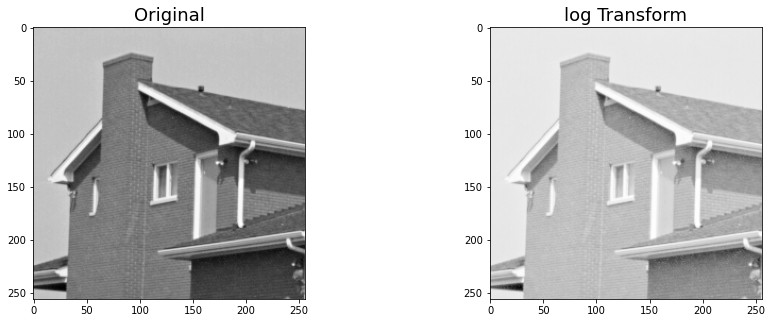

In [ ]:
im = cv2.imread('/content/House256.tif', 0)
print(im.dtype)
log_im = 0.6 * (np.log(1 + np.float32(im)))
#log_im = np.array(log_im, dtype = np.uint8)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.imshow(im,cmap='gray')
plt.title('Original',fontsize=18)


ax = fig.add_subplot(122)
plt.imshow(log_im,cmap='gray')
ax.set_title('log Transform',fontsize=18)

**Image Brightness and Linear Transform**

In [ ]:
# Another transform of the image, after adding a constant,
# all the pixels become brighter and a hazing-like effect of the image is generated
im = cv2.imread('/content/House256.tif')
cv2_imshow(im)

im3 = (100.0/255)*im + 100
cv2_imshow(im3)

# The lightness level of the gray_image decreases after this step
im4 = 255.0*(im/255.0)**2
cv2_imshow(im4)

**Power Law**

In [ ]:
# Open the image.
image = cv2.imread('/content/I23.BMP')

# Sample gamma values to test
for gamma in [0.2, 0.5, 1, 1.5, 1.8]:
    # Apply gamma correction.
    gamma_transformation = np.array(255*(image / 255) ** gamma, dtype = 'uint8')
    cv2_imshow(gamma_transformation)
    #cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_transformation)


# **2D Convolution or Filtering**

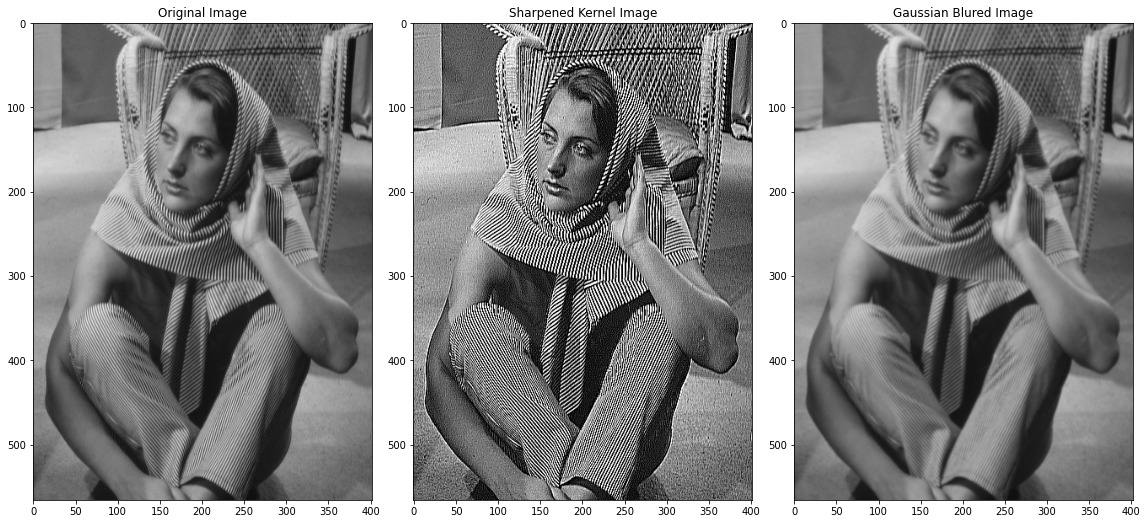

In [ ]:
image = cv2.imread("/content/barbara.tif")

fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()
# To conovolve the kernel on an image we can use cv.filter2D
#ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].imshow(image)
ax[0].set_title('Original Image')

kernel_sharpening = np.array([[-1, -1, -1],
                             [-1, 9, -1],
                             [-1, -1, -1]])

kernel_GaussBlur = (1/16)*np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]])
# Convolution operation using cv2.filter2D --------
# depth = -1 will give the output image depth as same as the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(sharpened)
ax[1].set_title('Sharpened Kernel Image')

GaussBlur = cv2.filter2D(image, -1, kernel_GaussBlur)
#ax[2].imshow(cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB))
ax[2].imshow(GaussBlur)
ax[2].set_title('Gaussian Blured Image')
plt.show()

# **2D Fourier Transform**

Row and Col dimensions are:  512 512


(Text(0.5, 1.0, 'Mag Spectrum: fftshift'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

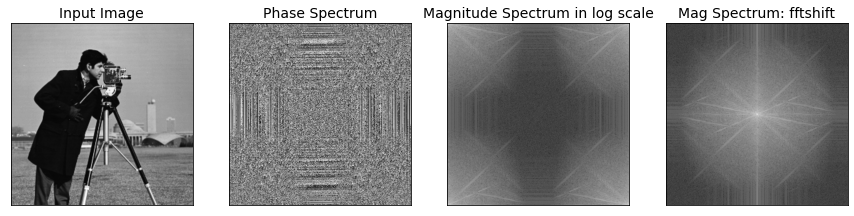

In [ ]:
img = cv2.imread('/content/Cameraman.tif', 0)
row = img.shape[0]
col = np.size(img, 1)

#Print the size information ----
print('Row and Col dimensions are: ', row, col)

# Apply Fourier Transform to the 2D image.
img_fft = np.fft.fft2(img) # Produces complex coefficients ----
img_fft_mag = np.abs(img_fft)  # Magnitude spectrum of img_fft. Frequency variables 0 <= u <= 2*pi & 0 <= v <= 2*pi
# For better display. Change Magnitude to log-Scale.
img_fft_mag1 = np.log(img_fft_mag + np.finfo(float).eps)
img_fft_magshift = np.fft.fftshift(img_fft_mag)
img_fft_magshift = np.log(img_fft_magshift + np.finfo(float).eps)
img_fft_phase = np.angle(img_fft)  # Phase Spectrum.

# Plot all results ----
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(141)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image', fontsize = 14), plt.xticks([]), plt.yticks([])
ax = fig.add_subplot(143), plt.imshow(img_fft_mag1, cmap = 'gray')
plt.title('Magnitude Spectrum in log scale', fontsize = 14), plt.xticks([]), plt.yticks([])
ax = fig.add_subplot(142), plt.imshow(img_fft_phase, cmap = 'gray')
plt.title('Phase Spectrum', fontsize = 14), plt.xticks([]), plt.yticks([])
ax = fig.add_subplot(144)
plt.imshow(img_fft_magshift, cmap = 'gray')
plt.title('Mag Spectrum: fftshift', fontsize = 14), plt.xticks([]), plt.yticks([])

 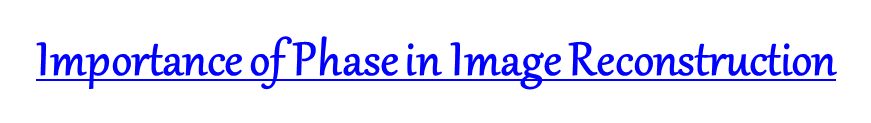

Text(0.5, 1.0, 'Rec Image1: Pahse of Imag2 and Mag of Img1')

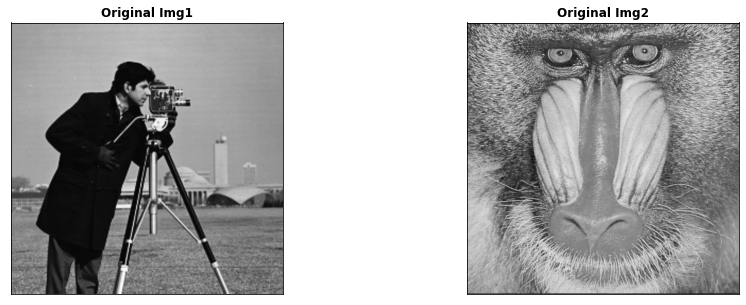

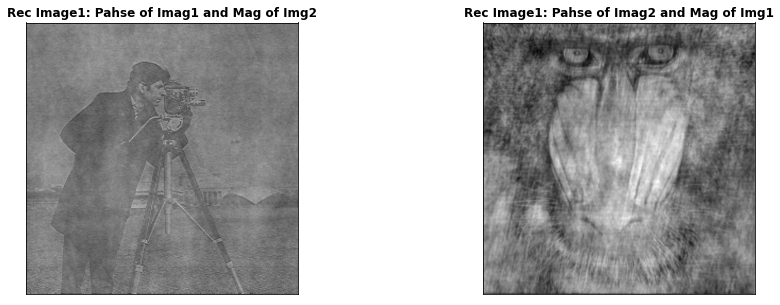

In [ ]:
# Read two images ----
img1 = cv2.imread('/content/Cameraman.tif', 0)
img2 = cv2.imread('/content/Baboon.jpg', 0)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.imshow(img1, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Original Img1', fontweight='bold')

ax = fig.add_subplot(122)
plt.imshow(img2, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Original Img2', fontweight='bold')

# Separate Phase and Mag components of img1 using FFT
fft_img1 = np.fft.fft2(img1)
fft_img1_mag = np.abs(fft_img1)
fft_img1_phase = np.angle(fft_img1)
# Separate Phase and Mag components of img1 using FFT
fft_img2 = np.fft.fft2(img2)
fft_img2_mag = np.abs(fft_img2)
fft_img2_phase = np.angle(fft_img2)

#Swap Phase and Magnitude of two images and recontruct using inverse FFT
swap_coeff1 = np.multiply(fft_img2_mag, np.exp(1j*fft_img1_phase))
rec_img1 = np.fft.ifft2(swap_coeff1)
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.imshow(np.real(rec_img1), cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Rec Image1: Pahse of Imag1 and Mag of Img2', fontweight='bold')

swap_coeff2 = np.multiply(fft_img1_mag, np.exp(1j*fft_img2_phase))
rec_img2 = np.fft.ifft2(swap_coeff2)
ax = fig.add_subplot(122)
plt.imshow(np.real(rec_img2), cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Rec Image1: Pahse of Imag2 and Mag of Img1', fontweight='bold')

# **Frequncy Domain Filtering**
[Highpass filter]

In [ ]:
img = cv2.imread('/content/Texture1.tiff', 0)

# Fourier transform uisng openCV inbuilt function
fft_img = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
fftshift_img = np.fft.fftshift(fft_img)

fftshiftmag_img = 20*np.log(cv2.magnitude(fftshift_img[:,:,0], fftshift_img[:,:,1]))

#Circular High freqncy mask. Center circle is zero remaining 1.
# Can be used for edge detection because low frequency at center are blocked.
# and only high frequencies are allowed.Edges are high frequncy components.
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2) # Locating center of the image

# Generate Filter mask for high freqncy.
mask = np.zeros((rows, cols, 2), np.uint8) # two channels to match DFT array dimenssion
r = 80; # Fixing the radius of the filter
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Multiply filter mask with the image
fftshift_fimg = fftshift_img * mask

# Get the magnitude spectrum of filtered img in Fourier domain: only for pliotting
fftshift_fimg_mag = 20*np.log(cv2.magnitude(fftshift_fimg[:,:,0], fftshift_img[:,:,1]))

# Apply ifftshift ---
fft_fimg = np.fft.ifftshift(fftshift_fimg)

# inverse FFT to get filtered image in spatial domain
filt_img = cv2.idft(fft_fimg)
filt_img = cv2.magnitude(filt_img[:, :, 0], filt_img[:,:,1])

# Plot varous results
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(221)
plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Input Img', fontweight='bold')

ax = fig.add_subplot(222)
plt.imshow(fftshiftmag_img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Mag Spect. of Img', fontweight = 'bold')

ax = fig.add_subplot(223)
plt.imshow(fftshift_fimg_mag, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('FFT + Mask', fontweight = 'bold')

ax = fig.add_subplot(224)
plt.imshow(filt_img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Filtered Image: HPF', fontweight = 'bold')

*More on **ogrid** function in mumpy*

In [ ]:
# Genrate random matrix.
m = np.random.random((10, 5))
rows, cols = m.shape

# Ogrid stands for “open grid” and basically provides a way to act on specific
# pixels of an image based on their row and column index.
x, y = np.ogrid[:rows, :cols]
print('x is: \n',x, '\n')
print('y is: \n',y, '\n')

print('m using x and y: \n', m[x,y], '\n')

# Creating MASK
mask1 = (x > 5) | (y < 3)
print('Mask is:', mask1, '\n')

# Applying mask on m
m[mask1] = 0
print('Masked m is:', m, '\n')

**Frequncy Domain Filtering** [Low Pass Filter]

Text(0.5, 1.0, 'Filtered Image: LPF')

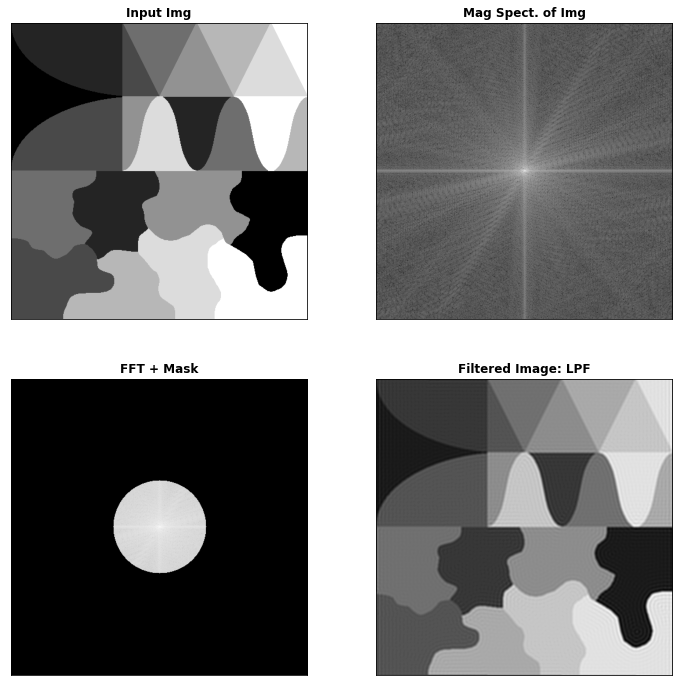

In [ ]:
text_im = cv2.imread('/content/Texture1.tiff', 0)
rows, cols = text_im.shape

# Obtain Fourier transform of the image
textim_fft = np.fft.fft2(text_im)
textim_fftshift = np.fft.fftshift(textim_fft)
# Magnitude spectrum
textim_MagFFTshift = 20*np.log(np.fft.fftshift(np.abs(textim_fft)))

#Generate filter MASK: Low pass filter: Circular mask with central regions of
# low frequency band 1 and rest 0.
crow, ccol = int(rows/2), int(cols/2) # Locating center of the image
mask = np.zeros((rows, cols), np.uint8)
r = 80; # Fixing the radius of the filter
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1

# Multiply mask and fft of the image in freqeuncy domain.
fftshift_fimg = textim_fftshift * mask
# Magnitude spectrum of Filtered image: For display
fft_fMagFFTshift = 20*np.log(np.abs(fftshift_fimg)+ np.finfo(float).eps)

fft_fimg = np.fft.ifftshift(fftshift_fimg)
# Obtained the output filtered image in spatial domain
filt_imgLP = np.abs(np.fft.ifft2(fft_fimg))


# Plot varous results
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(221)
plt.imshow(text_im, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Input Img', fontweight='bold')

ax = fig.add_subplot(222)
plt.imshow(textim_MagFFTshift, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Mag Spect. of Img', fontweight = 'bold')

ax = fig.add_subplot(223)
plt.imshow(fft_fMagFFTshift, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('FFT + Mask', fontweight = 'bold')

ax = fig.add_subplot(224)
plt.imshow(filt_imgLP, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Filtered Image: LPF', fontweight = 'bold')

**Discrete Cosine Transform**


DCT(src, dst, flags) → None

    Performs a forward or inverse Discrete Cosine transform of a 1D or 2D
    floating-point array.

    Parameters:

        src (CvArr) – Source array, real 1D or 2D array
        dst (CvArr) – Destination array of the same size and same type as the source
        flags (int) –

        Transformation flags, a combination of the following values
            CV_DXT_FORWARD do a forward 1D or 2D transform.
            CV_DXT_INVERSE do an inverse 1D or 2D transform.
            CV_DXT_ROWS do a forward or inverse transform of every individual row of
the input matrix. This flag allows user to transform multiple vectors simultaneously
and can be used to decrease the overhead (which is sometimes several times larger
than the processing itself), to do 3D and higher-dimensional transforms and so forth.

In [ ]:
#mat = np.array([(1, 3, 4, 6), (2, 4, 10, 12), (11, 15, 17, 25), (14, 12, 10, 5)])
mat = np.array([8, 16, 24, 32, 40, 48, 56, 64])
print('Input matrix is: \n', mat.shape)

mat1 = np.float32(mat)
DCT_mat = cv2.dct(mat1)
print('\n')
print('DCT of input matrix is: \n', DCT_mat.shape)

DCT_mat1 = np.float32(np.zeros(8))
#DCT_mat1[0, 0:3] = DCT_mat[0, 0:3]
print('\n')
print('Modified DCT Mat: \n', DCT_mat1)
# Inverse DCT transform ---
rec_mat = cv2.idct(DCT_mat1)

Input matrix is: 
 (8,)


DCT of input matrix is: 
 (8, 1)


Modified DCT Mat: 
 [0. 0. 0. 0. 0. 0. 0. 0.]


# **Color Image Processing**

**[RGB2CMY]**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


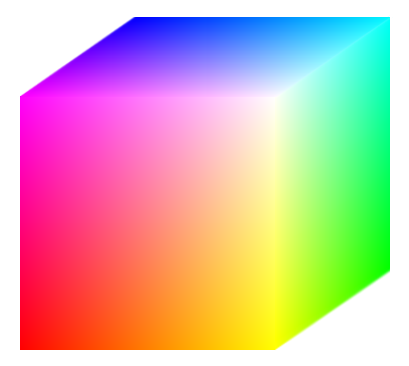

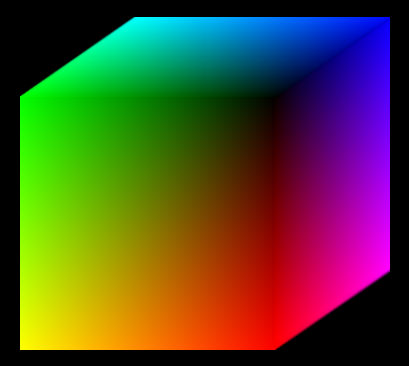

In [ ]:
bgr = cv2.imread('/content/Fig0608(RGB-full-color-cube).tif')

# Make float and divide by 255 to give BGRdash
bgrdash = bgr.astype(np.float)/255.

#B = bgr[:, :, 0].astype(float) # float conversion, maybe we can do better. But this results in correct answer
#G = bgr[:, :, 1].astype(float) #
#R = bgr[:, :, 2].astype(float) #

# Calculate C
C = (1-bgrdash[...,2])

# Calculate M
M = (1-bgrdash[...,1])

# Calculate Y
Y = (1-bgrdash[...,0])

# Combine 4 channels into single image and re-scale back up to uint8
CMY = (np.dstack((C,M,Y)) * 255).astype(np.uint8)
cv2_imshow(bgr)
cv2_imshow(CMY)

**RGB2HSI**

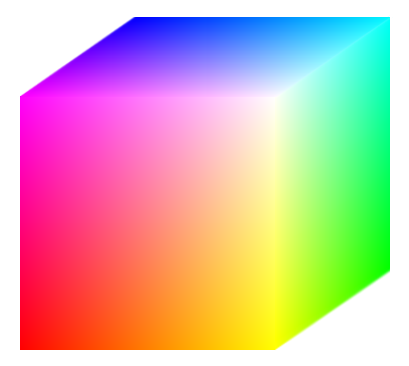

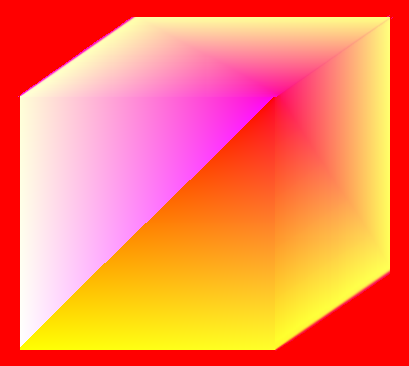

Text(0.5, 1.0, 'Intensity Component')

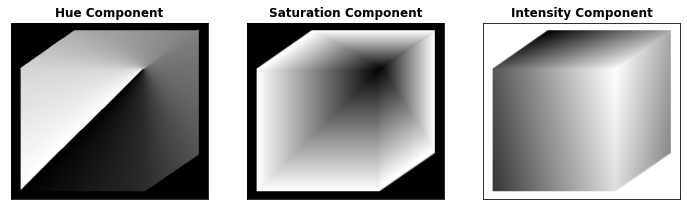

In [ ]:
im_bgr = cv2.imread('/content/Fig0608(RGB-full-color-cube).tif')
B, G, R = cv2.split(im_bgr)
im_hsi = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2HSV_FULL)
H, S, V = cv2.split(im_hsi) # Split the image into its channels
I = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2GRAY)

cv2_imshow(im_bgr)
cv2_imshow(im_hsi)

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(131)
plt.imshow(H, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Hue Component', fontweight='bold')

ax = fig.add_subplot(132)
plt.imshow(S, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Saturation Component', fontweight='bold')

ax = fig.add_subplot(133)
plt.imshow(I, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Intensity Component', fontweight='bold')

**Pseudo-Color Image Processing**

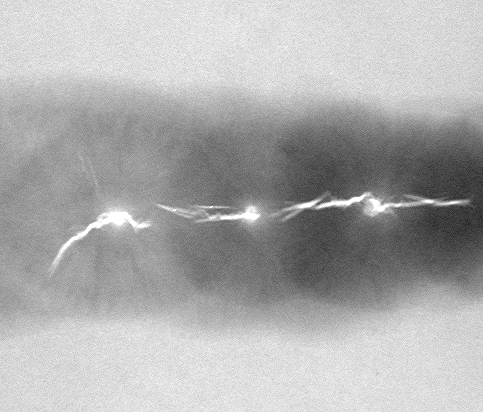

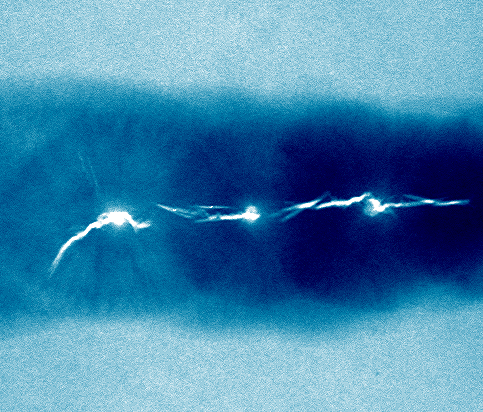

In [ ]:
im_gray = cv2.imread("/content/Fig0621(a)(weld-original).tif", cv2.IMREAD_GRAYSCALE)
# Flase color
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_OCEAN)
cv2_imshow(im_gray)
cv2_imshow(im_color)

# **Image Thresholding**

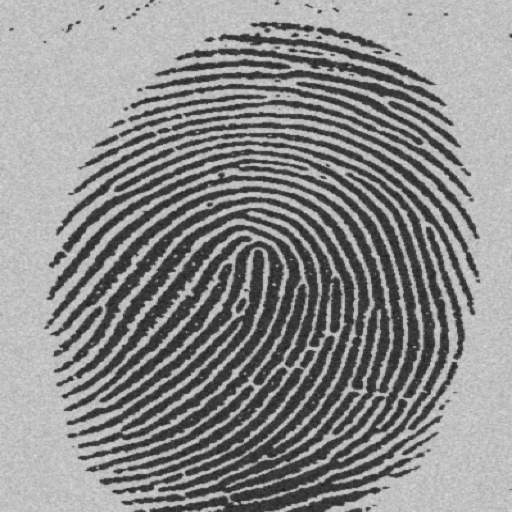

Text(0, 0.5, 'Count')

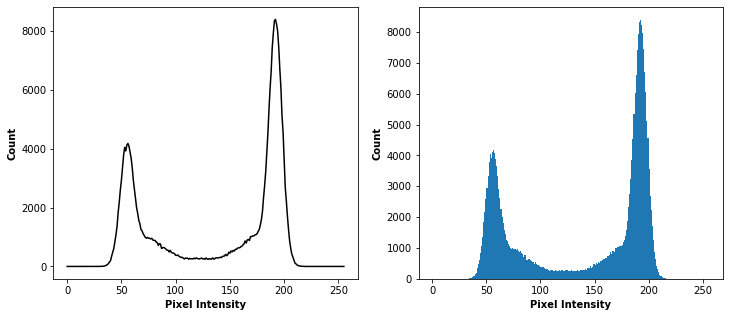

In [ ]:
img = cv2.imread('/content/Fig1038(a)(noisy_fingerprint).tif', 0)
img = cv2.resize(img, (512, 512))
cv2_imshow(img)
# Find image histogram to find suitable threshold value ---
# Using OpenCV -----
# cv2.calcHist(images, channels, mask, histSize, ranges)
img_hist = cv2.calcHist([img],[0],None,[256],[0,256])

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,2,1)
plt.plot(img_hist, color = 'k')
plt.xlabel('Pixel Intensity', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')

# Using Matplotlib ----
ax = fig.add_subplot(1,2,2)
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Pixel Intensity', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')

# From histogram it is evident that a good threshold point to separate object from background
# is the vally point for this example: around 120 to 130


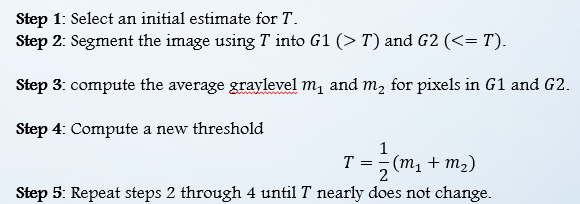

Text(0.5, 1.0, 'Thresholded Image')

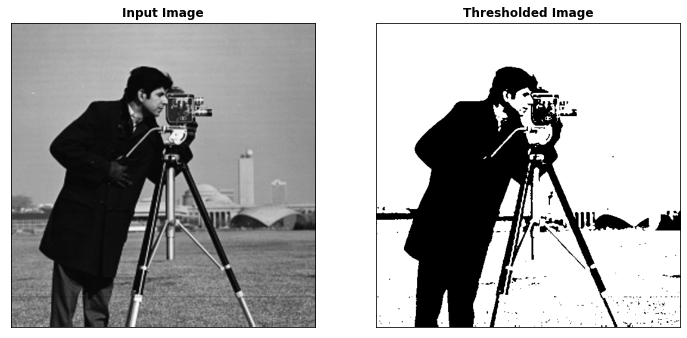

In [ ]:
# Determining Global threshold ------
img = cv2.imread('/content/Cameraman.tif', 0)
img = img.astype(float)
rows, cols = img.shape

# Select initial threshold.
T = img.mean()
# Compute Mean between two classes.
t1 = img<=T
t2 = img>T
mean1 = img[t1].sum()/t1.sum()
mean2 = img[t2].sum()/t2.sum()

# Initialize the global threshold value T0
T0 = 0
while np.abs(T - T0) > 10**-3:
  T0 = T
  T = (mean1+mean2)/2
  t1 = img<=T
  t2 = img>T
  mean1 = img[t1].sum()/t1.sum()
  mean2 = img[t2].sum()/t2.sum()

#Apply threholding ----
ret, thresh_img = cv2.threshold(img, T0, 255, cv2.THRESH_BINARY)

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(121)
plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Input Image', fontweight = 'bold')

ax = fig.add_subplot(122)
plt.imshow(thresh_img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Thresholded Image', fontweight = 'bold')

# **Histogram Equalization**

Text(0, 0.5, 'Count')

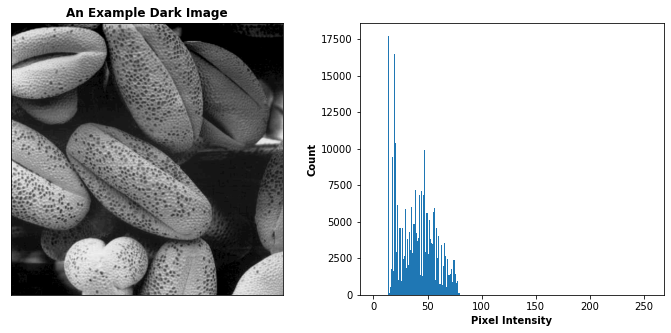

In [ ]:
# Dark Image
img = cv2.imread('/content/Fig0316(4)(bottom_left).tif', 0)

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,2,1)
plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('An Example Dark Image', fontweight = 'bold')

# Histogram Using Matplotlib ----
ax = fig.add_subplot(1,2,2)
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Pixel Intensity', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')

Text(0, 0.5, 'Count')

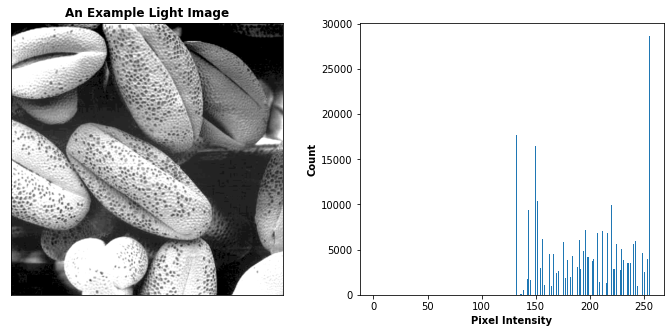

In [ ]:
# Light Image
img = cv2.imread('/content/Fig0316(1)(top_left).tif', 0)

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,2,1)
plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('An Example Light Image', fontweight = 'bold')

# Histogram Using Matplotlib ----
ax = fig.add_subplot(1,2,2)
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Pixel Intensity', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')

Text(0, 0.5, 'Count')

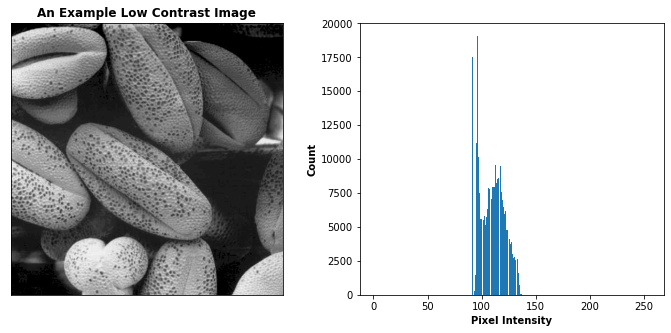

In [ ]:
# Low-Contrast Image
img = cv2.imread('/content/Fig0316(2)(2nd_from_top).tif', 0)

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,2,1)
plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('An Example Low Contrast Image', fontweight = 'bold')

# Histogram Using Matplotlib ----
ax = fig.add_subplot(1,2,2)
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Pixel Intensity', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')

Text(0, 0.5, 'Count')

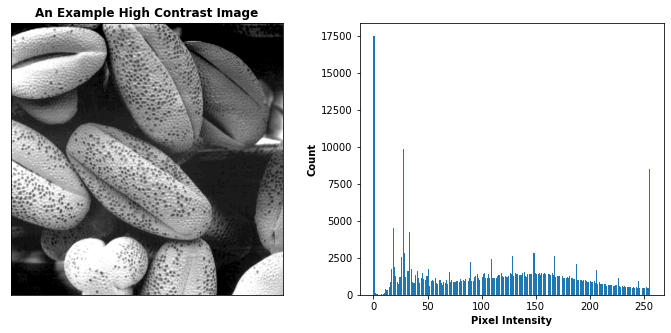

In [ ]:
# High-Contrast Image
img = cv2.imread('/content/Fig0316(3)(third_from_top).tif', 0)

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(1,2,1)
plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('An Example High Contrast Image', fontweight = 'bold')

# Histogram Using Matplotlib ----
ax = fig.add_subplot(1,2,2)
plt.hist(img.ravel(),256,[0,256])
plt.xlabel('Pixel Intensity', fontweight = 'bold')
plt.ylabel('Count', fontweight = 'bold')

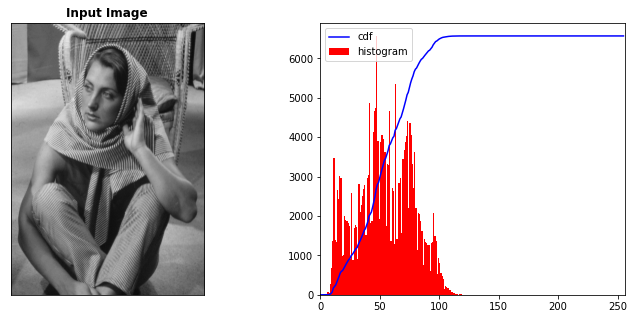

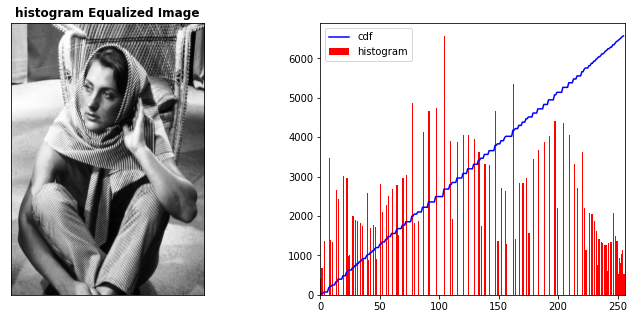

In [ ]:
# img_gray = np.array([[52,	55,	61,	59,	79,	61,	76,	61], [62,	59,	55,	104,	94,	85,	59,	71],
#                      [63,	65,	66,	113,	144,	104,	63,	72], [64,	70,	70,	126,	154,	109,	71,	69],
#                      [67,	73,	68,	106,	122,	88,	68,	68], [68,	79,	60,	70,	77,	66,	58,	75],
#                      [69,	85,	64,	58,	55,	61,	65,	83], [70,	87,	69,	68,	65,	73,	78,	90]])
img_gray = cv2.imread('/content/barbara_Dark.tif', 0)

fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1,2,1)
plt.imshow(img_gray, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('Input Image', fontweight = 'bold')

hist,bins = np.histogram(img_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
ax = fig.add_subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

# Histogram Equalization
HE_img = cv2.equalizeHist(np.uint8(img_gray))
fig = plt.figure(figsize = (12, 5))
ax = fig.add_subplot(1,2,1)
plt.imshow(HE_img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.title('histogram Equalized Image', fontweight = 'bold')

hist,bins = np.histogram(HE_img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
ax = fig.add_subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(HE_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')